# Content List: 

## 1. Importing libraries and data:
   - Various libraries such as pandas, numpy, seaborn, matplotlib, and scikit-learn are imported.
   - The dataset is loaded into a pandas DataFrame called `df`.
   
## 2. Renaming columns and data exploration:
   - The column 'CrashDay' is used to create a new numeric column called 'DayCode' based on a predefined mapping of days to codes.
   - The unique value counts for selected columns of interest are calculated and printed.

## 3. The elbow technique:
   - The code uses the elbow method to determine the optimal number of clusters. It iterates over a range of potential cluster counts and calculates the sum of squared distances from each data point to its nearest centroid (within-cluster sum of squares) for each option.
   - The results are plotted on an elbow curve to visualize the rate of variation.
   - The curve helps identify the optimal number of clusters based on the point where adding more clusters provides diminishing returns in terms of reducing the within-cluster sum of squares.
   - In this example, it suggests that the optimal number of clusters is three.

## 4. K-means clustering:
   - A KMeans object is created with the desired number of clusters (in this case, 3).
   - The k-means object is fitted to the data using the `fit` method.
   - The `fit_predict` method is used to assign each data point to a cluster.

## 5. Visualizations:
   - The code creates several scatter plots using seaborn to visualize the clusters.
   - The scatter plots show the relationships between different features (e.g., BikeAge, CrashHour, Latitude, Longitude) with the clusters represented by different colors.
   - The plots provide insights into the patterns and distributions of the data within each cluster.

## 6. Cluster analysis:
   - The code groups the data by cluster and calculates various statistics (mean, median) for selected columns.
   - The results are displayed in a tabular format, showing how different attributes vary across the clusters.

## 7. Saving visualizations as images:
   - The code saves the bar graphs generated for each cluster as separate image files using `plt.savefig`.

## 8. Count of data points in each cluster:
   - The code calculates the count of data points in each cluster and creates a bar graph to visualize the distribution.

## 9. Correlation heatmap:
   - The code calculates the correlation matrix for each cluster using the `corr` method.
   - The resulting correlation matrix is visualized as a heatmap using seaborn's `heatmap` function.
   - The heatmap helps identify the correlation between different features within each cluster.

Overall, the code performs k-means clustering on the bike crash data, explores the clusters, and visualizes the results using various plots and analysis techniques.

## 1. Importing libraries and data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Prepared Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'NCDOT_BikePedCrash.csv'))

In [5]:
df.shape

(11044, 31)

## 2. Renaming columns and data exploration:

In [6]:
df['CrashDay'].head()

0    Tuesday
1     Friday
2     Monday
3     Friday
4     Friday
Name: CrashDay, dtype: object

In [7]:
# Create a new numeric column "DayCode" based on the "CrashDay" column
day_codes = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['DayCode'] = df['CrashDay'].map(day_codes)

In [8]:
df.describe()

,BikeAge,CrashHour,CrashYear,DrvrAge,Latitude,Longitude,DrvrAgeImputedFlag,BikeAgeImputedFlag,MonthCode,DayCode
count,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000
mean,32.526495,14.576874,2012.562206,42.038506,35.463431,-79.276781,0.139352,0.017476,6.861192,3.879301
std,17.578942,4.794838,3.452374,16.108923,0.572896,1.538607,0.346329,0.131041,3.005929,1.933985
min,0.000000,0.000000,2007.000000,9.000000,33.869962,-84.152986,0.000000,0.000000,1.000000,1.000000
25%,18.000000,12.000000,2010.000000,29.000000,35.168739,-80.696757,0.000000,0.000000,5.000000,2.000000
50%,29.000000,15.000000,2013.000000,42.038506,35.590104,-78.954483,0.000000,0.000000,7.000000,4.000000
75%,48.000000,18.000000,2016.000000,52.000000,35.914741,-78.050247,0.000000,0.000000,9.000000,5.000000
max,93.000000,23.000000,2018.000000,99.000000,36.555054,-75.463524,1.000000,1.000000,12.000000,7.000000


In [9]:
# Specify the columns of interest
columns_of_interest = ['DayCode','BikeAge', 'CrashHour', 'CrashYear', 'DrvrAge', 'Latitude', 'Longitude', 'DrvrAgeImputedFlag', 'BikeAgeImputedFlag', 'MonthCode']

# Calculate the count of unique values for each specified column
unique_counts = df[columns_of_interest].nunique()

# Print the unique value counts for each specified column
print(unique_counts)

DayCode                   7
BikeAge                  92
CrashHour                24
CrashYear                12
DrvrAge                  87
Latitude              11019
Longitude             11001
DrvrAgeImputedFlag        2
BikeAgeImputedFlag        2
MonthCode                12
dtype: int64


There doesn't seem to be columns besides the flag ones which would take away too much and have a bias

In [10]:
# Select the desired columns
columns_to_include = ['DayCode', 'BikeAge', 'CrashHour', 'CrashYear', 'DrvrAge', 'Latitude', 'Longitude', 'MonthCode']
data_to_plot = df[columns_to_include]


In [11]:
data_to_plot.head()

,DayCode,BikeAge,CrashHour,CrashYear,DrvrAge,Latitude,Longitude,MonthCode
0,2,11.0,16.0,2007,35.000000,36.039490,-78.883896,1
1,5,20.0,9.0,2007,64.000000,35.751118,-78.782800,1
2,1,37.0,17.0,2007,39.000000,35.084732,-80.697820,1
3,5,30.0,17.0,2007,42.038506,35.684400,-80.479320,1
4,5,45.0,12.0,2007,51.000000,34.999428,-78.904450,1


## 3. The elbow technique:

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(data_to_plot).score(data_to_plot) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\clust

[-6834484.012625495,
 -4204209.01949315,
 -3012054.684637615,
 -2323212.9580962756,
 -1966342.4578346633,
 -1736232.846232431,
 -1538759.9836557677,
 -1435358.1018640224,
 -1353696.1358011106]

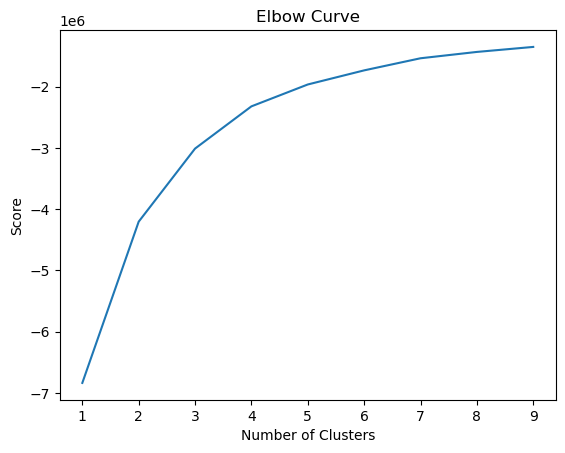

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

## 4. K-means clustering:

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [16]:
# Fit the k-means object to the data.

kmeans.fit(data_to_plot)

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
data_to_plot['clusters'] = kmeans.fit_predict(data_to_plot)

C:\Users\Ankit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ankit\AppData\Local\Temp\ipykernel_16232\2049843680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['clusters'] = kmeans.fit_predict(data_to_plot)


In [18]:
data_to_plot.head()

,DayCode,BikeAge,CrashHour,CrashYear,DrvrAge,Latitude,Longitude,MonthCode,clusters
0,2,11.0,16.0,2007,35.000000,36.039490,-78.883896,1,1
1,5,20.0,9.0,2007,64.000000,35.751118,-78.782800,1,2
2,1,37.0,17.0,2007,39.000000,35.084732,-80.697820,1,0
3,5,30.0,17.0,2007,42.038506,35.684400,-80.479320,1,1
4,5,45.0,12.0,2007,51.000000,34.999428,-78.904450,1,0


In [19]:
data_to_plot['clusters'].value_counts()

1    5036
0    3509
2    2499
Name: clusters, dtype: int64

## 5. Visualizations:

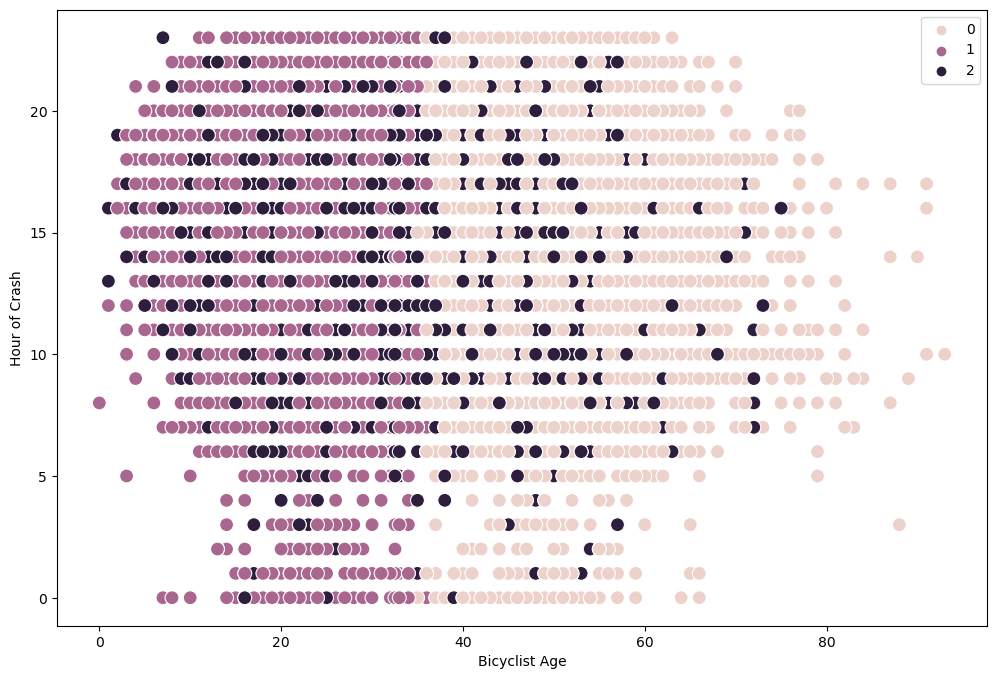

In [20]:
#It seems like the pink group is seen in under a littl bit less than forty, the black one in the older ones and the purple one is found in all the age ranges
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_plot['BikeAge'], y=data_to_plot['CrashHour'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Bicyclist Age') # Label x-axis.
plt.ylabel('Hour of Crash') # Label y-axis.
plt.show()

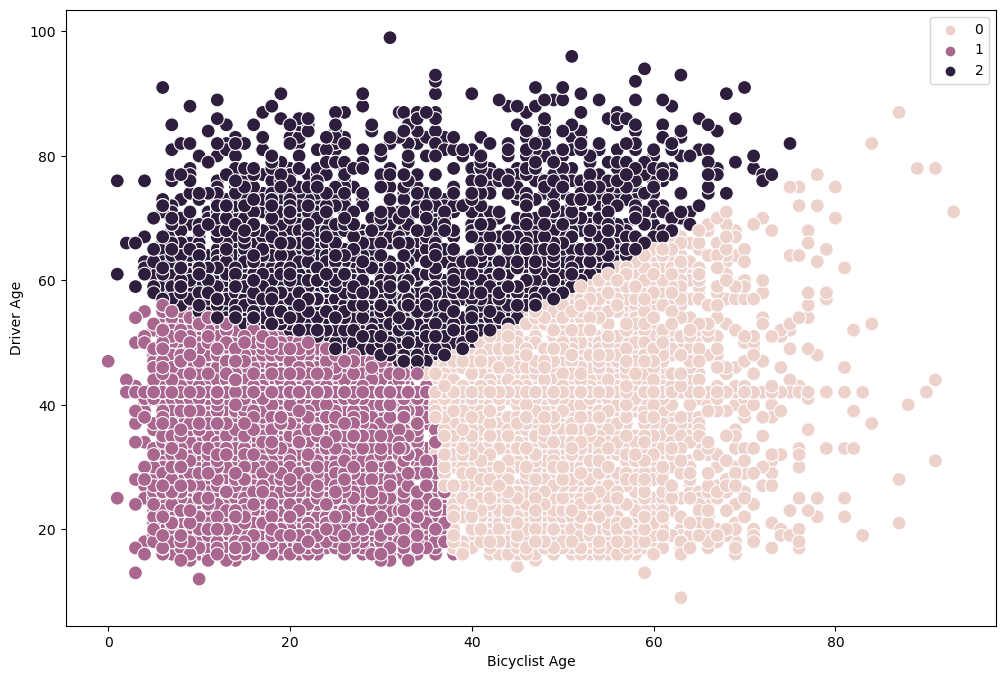

In [21]:
#Here it shows that the pink group is crashes where both parties were young, in the black, the bicyclist were old and in the purple, the drivers were old. 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['BikeAge'], y=df['DrvrAge'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Bicyclist Age') 
plt.ylabel('Driver Age') 
plt.show()

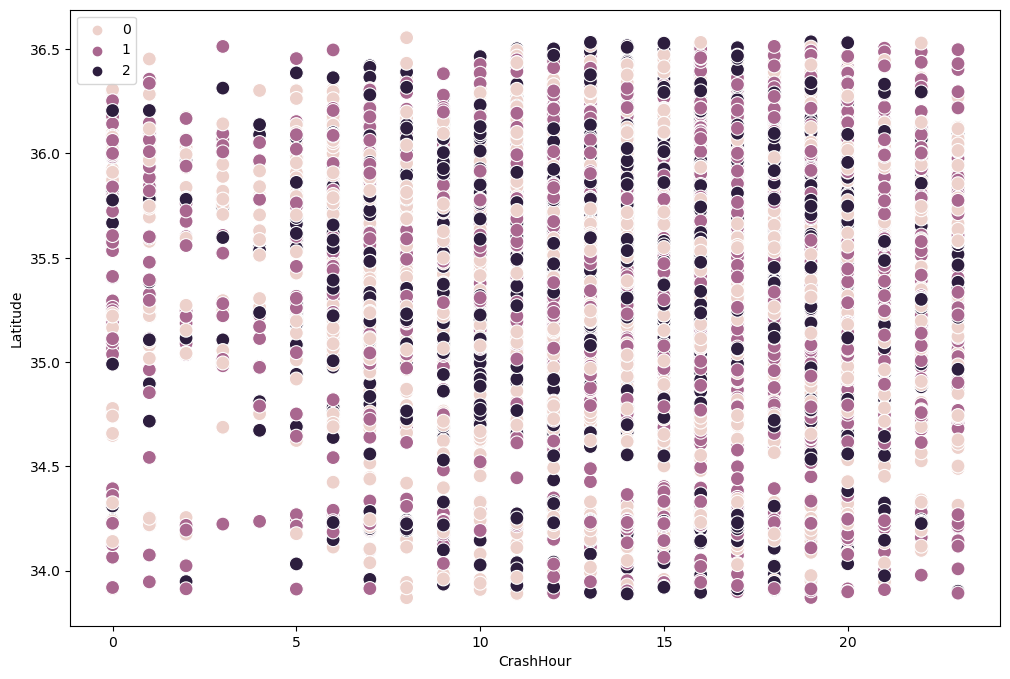

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['CrashHour'], y=df['Latitude'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('CrashHour') 
plt.ylabel('Latitude') 
plt.show() 

This shows that, not many crashes happen early in the day specially in the south, we see alot of young drivers invovled earlier in the day and later in the day at night, rarely are older drivers seen but when they are, it's in the middle of the day. Most crasehs it seems are happening between young people as well which makes sense. As an insurance company, it seems like teh lattitude around 30 degrees shows the least amount of pink and purples meaning young people aren't at risk  and reckless there so low insurance prices can compete there. 

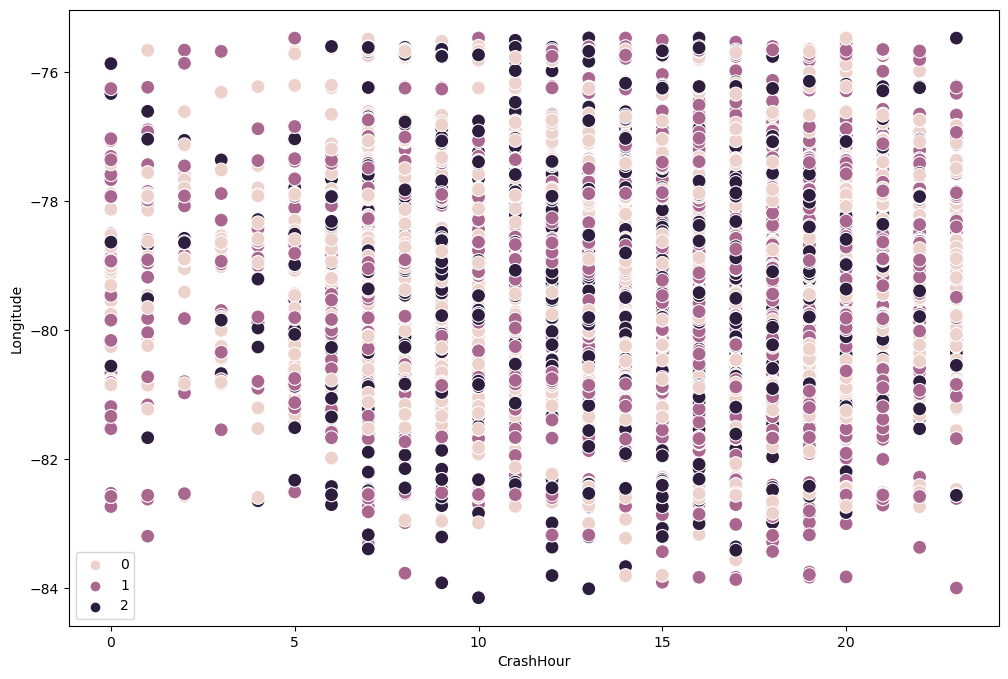

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['CrashHour'], y=df['Longitude'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('CrashHour') 
plt.ylabel('Longitude') 
plt.show() 

same as above, earlier in the day is safest, western part is safest esepcailly earlier on, There's alot of purple in the eastern and western borders which means not alot of young reckless drivers and bicyclists meaning they can get a compteitive price on their insurance policies. 

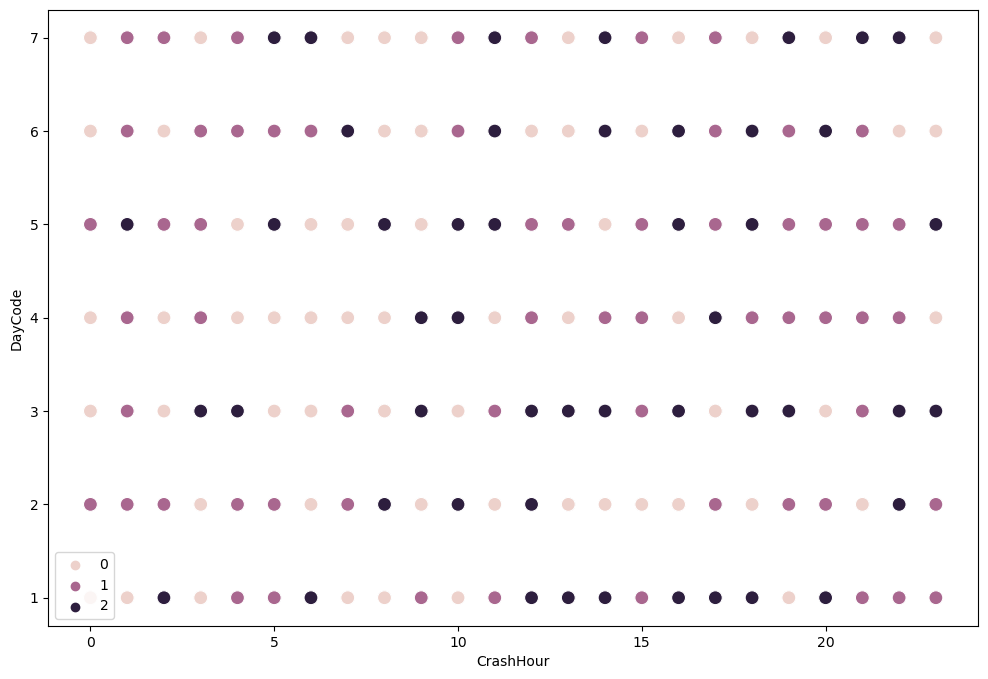

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['CrashHour'], y=df['DayCode'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('CrashHour') 
plt.ylabel('DayCode') 
plt.show() 

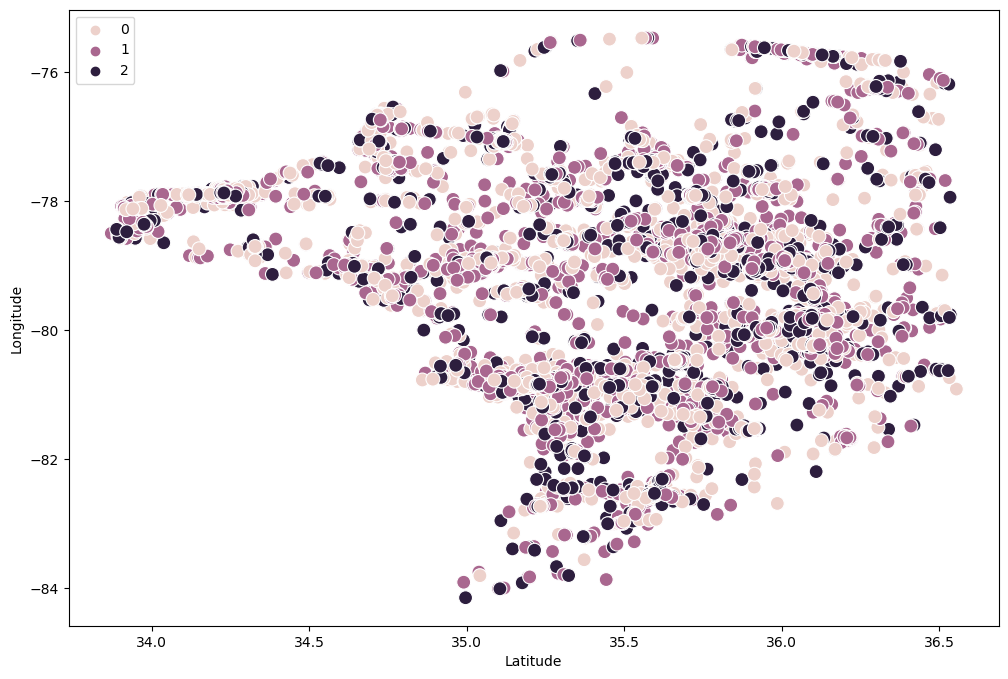

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Latitude'], y=df['Longitude'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Latitude') 
plt.ylabel('Longitude') 
plt.show() 

This shows alot of hotspots

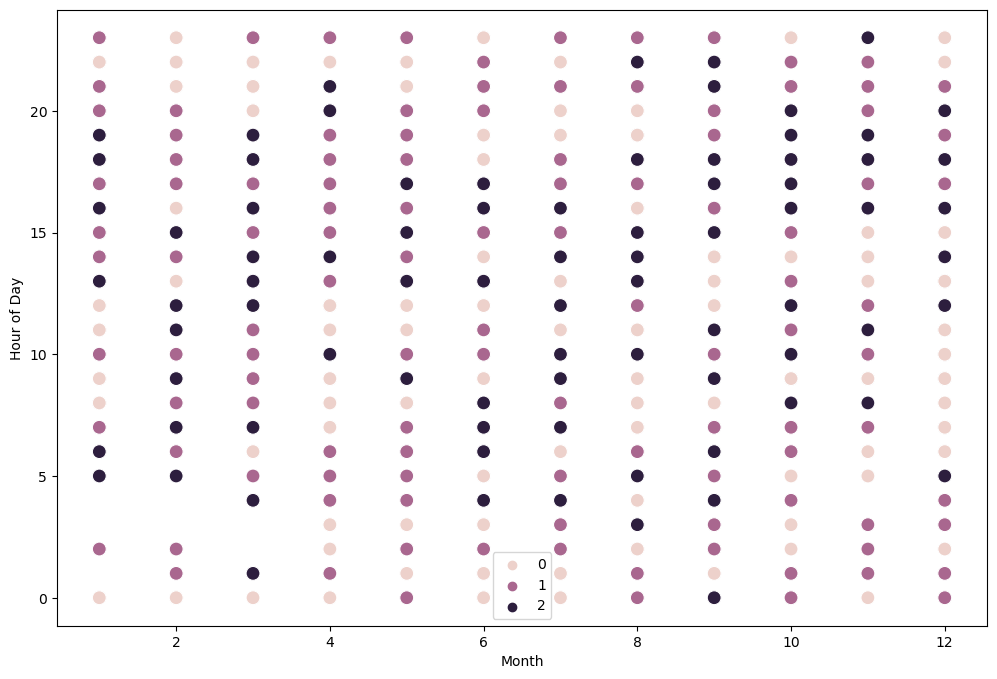

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['MonthCode'], y=df['CrashHour'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Month') 
plt.ylabel('Hour of Day') 
plt.show() 

This shows that earlier on in the day and month are the safest times and it shows that earlier on in the year is the most dangeorus times for young people. 

In [27]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

KeyError: 'clusters'

In [28]:
df.groupby('cluster').agg({
    'DayCode': ['mean', 'median'],
    'BikeAge': ['mean', 'median'],
    'CrashHour': ['mean', 'median'],
    'CrashYear': ['mean', 'median'],
    'DrvrAge': ['mean', 'median'],
    'Latitude': ['mean', 'median'],
    'Longitude': ['mean', 'median'],
    'MonthCode': ['mean', 'median']
})


KeyError: 'cluster'

After seeing how age is mainly the grouper here, and ignoring the age values, all the other values are very constant and stable meaning, the combination of age groups of the bicyclists and drivers doesn't increae or decreae chances of crashes however, it is very obvious that based on things like location, time, month and day, there are hot stpots for each group. 

These results can be useful in the fute as they seem to have grouped findings based on the age combination of bicyclist and driver ages.

## 6. Cluster analysis:

In [29]:
data_to_plot.loc[data_to_plot['clusters'] == 2, 'cluster'] = 'dark purple'
data_to_plot.loc[data_to_plot['clusters'] == 1, 'cluster'] = 'purple'
data_to_plot.loc[data_to_plot['clusters'] == 0, 'cluster'] = 'pink'

data_to_plot.groupby('cluster').agg({
    'DayCode': ['mean', 'median'],
    'BikeAge': ['mean', 'median'],
    'CrashHour': ['mean', 'median'],
    'CrashYear': ['mean', 'median'],
    'DrvrAge': ['mean', 'median'],
    'Latitude': ['mean', 'median'],
    'Longitude': ['mean', 'median'],
    'MonthCode': ['mean', 'median']
})



C:\Users\Ankit\AppData\Local\Temp\ipykernel_16232\2159738099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot.loc[data_to_plot['clusters'] == 2, 'cluster'] = 'dark purple'


DayCode           BikeAge         CrashHour           CrashYear  \
                 mean median       mean median       mean median         mean   
cluster                                                                         
dark purple  3.779912    4.0  30.750157   29.0  14.246899   15.0  2013.084834   
pink         3.941009    4.0  52.263608   52.0  14.110573   15.0  2012.590197   
purple       3.885624    4.0  19.655475   19.0  15.065528   16.0  2012.283360   

                       DrvrAge          Latitude             Longitude  \
             median       mean median       mean     median       mean   
cluster                                                                  
dark purple  2013.0  64.196879   63.0  35.470845  35.590475 -79.273760   
pink         2013.0  37.566583   39.0  35.428065  35.528150 -79.210744   
purple       2012.0  34.158880   36.0  35.484395  35.608419 -79.324294   

                       MonthCode         
                median      mean median  
cluster                                  
dark purple -78.976650  6.894758    7.0  
pink        -78.942439  6.976917    7.0  
purple      -78.953505  6.763900    7.0

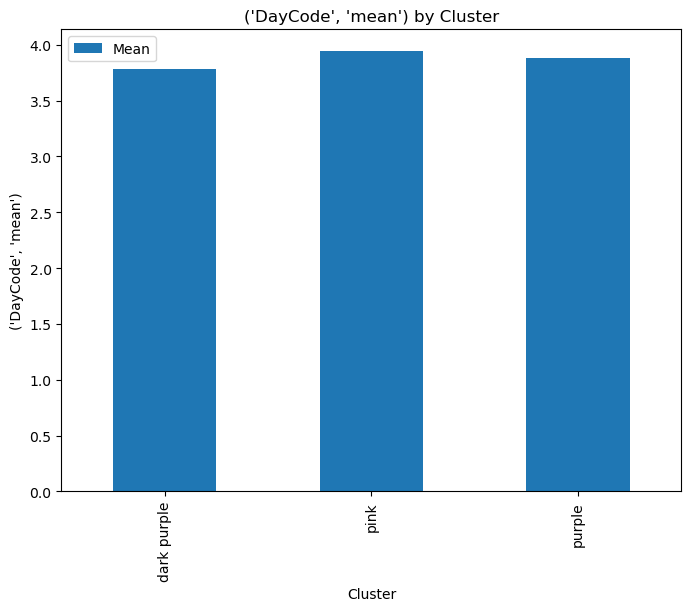

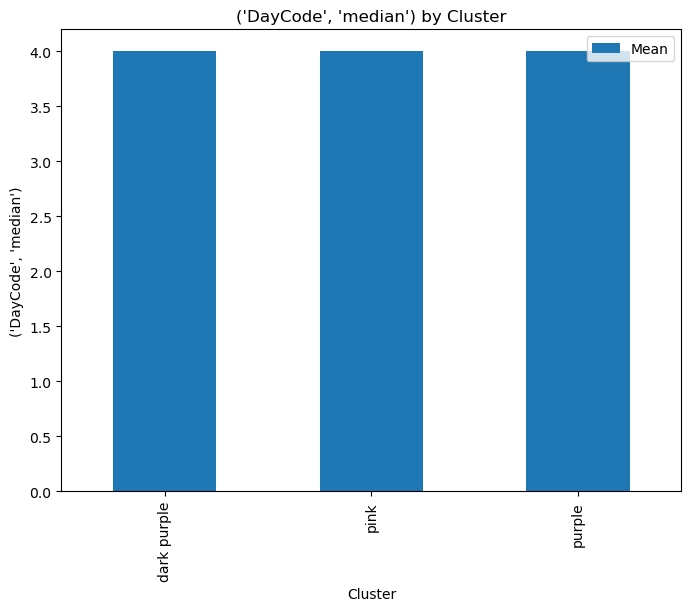

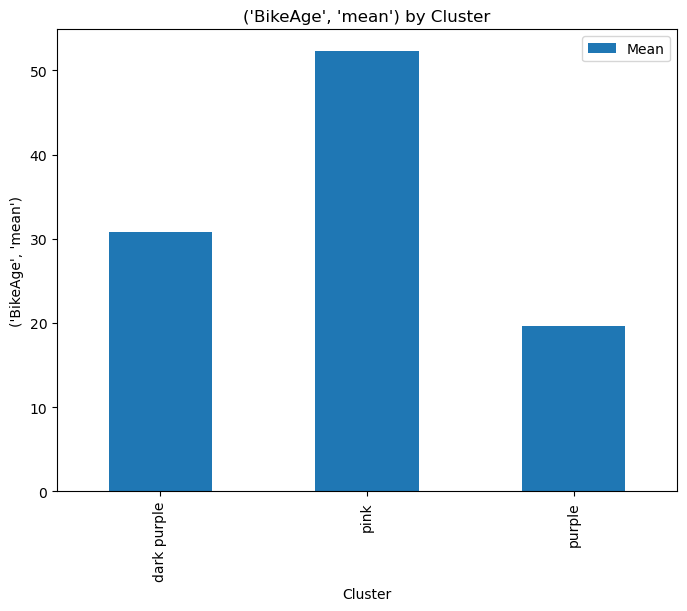

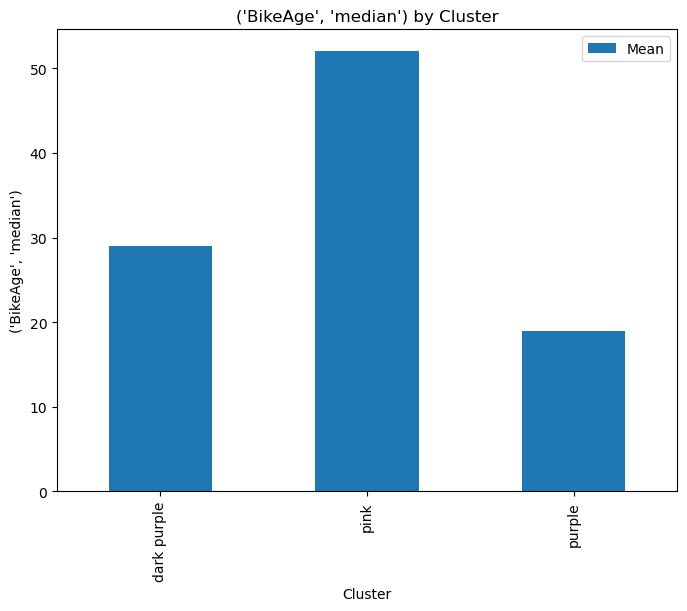

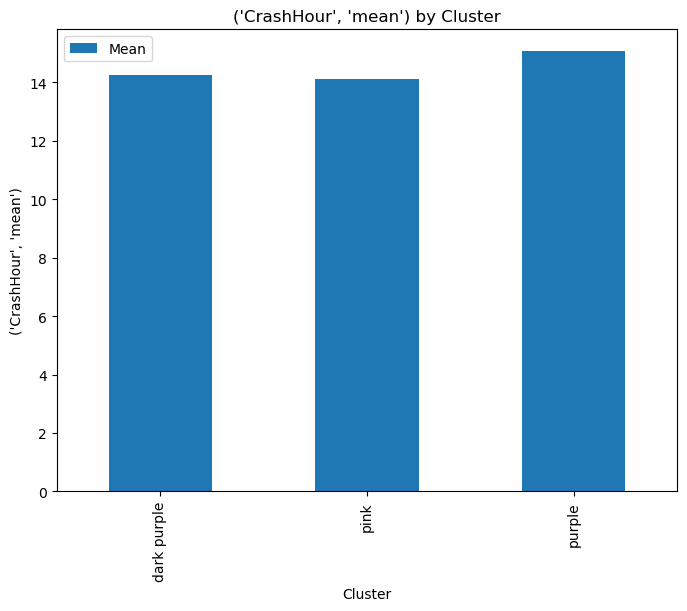

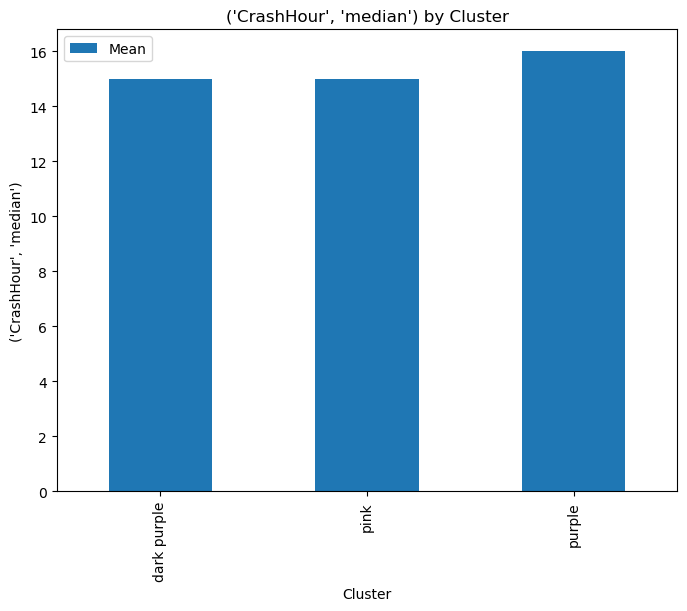

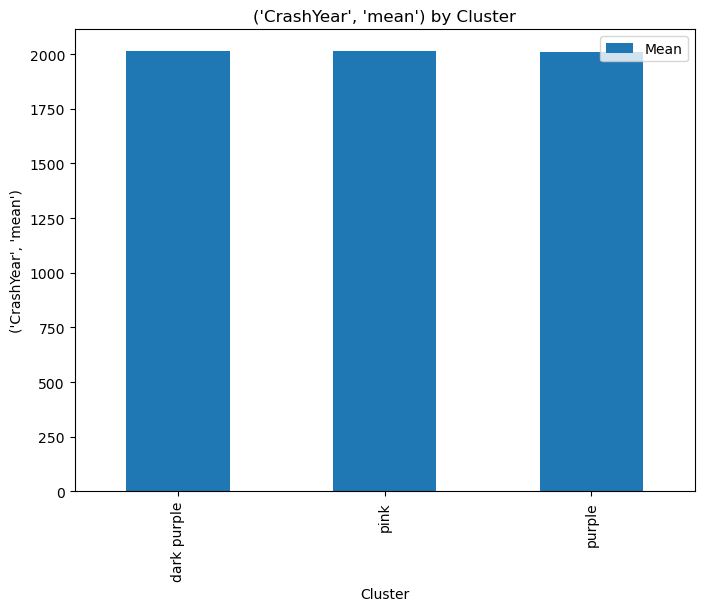

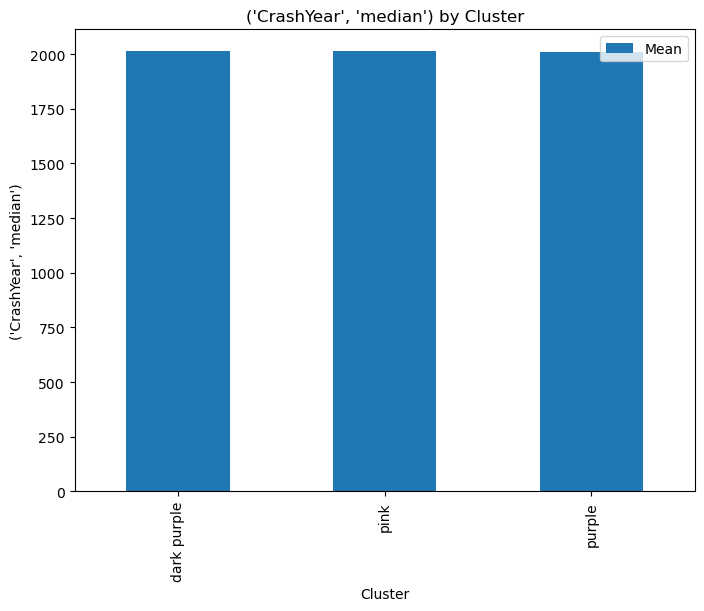

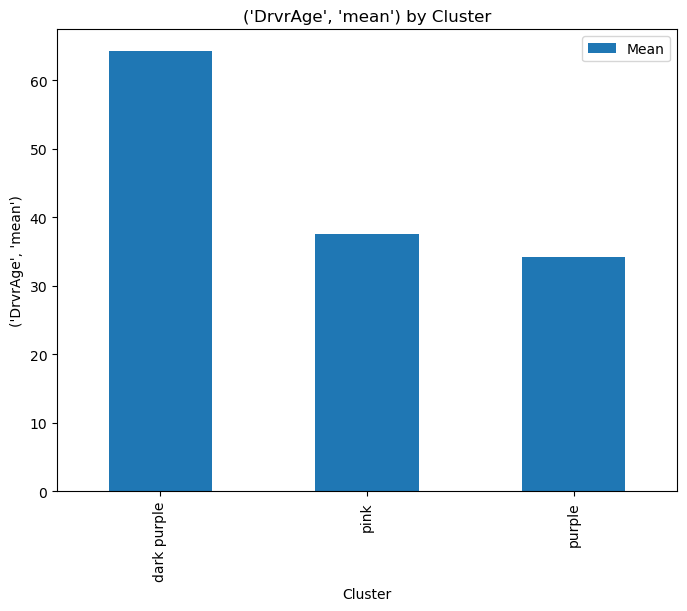

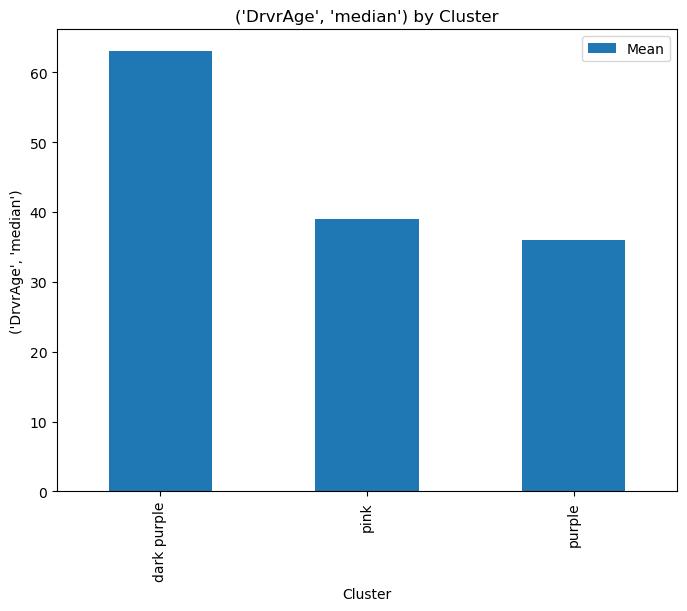

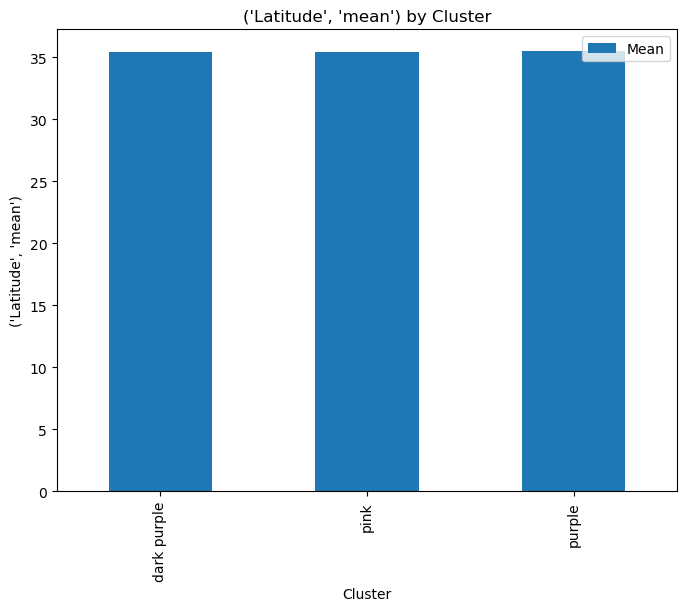

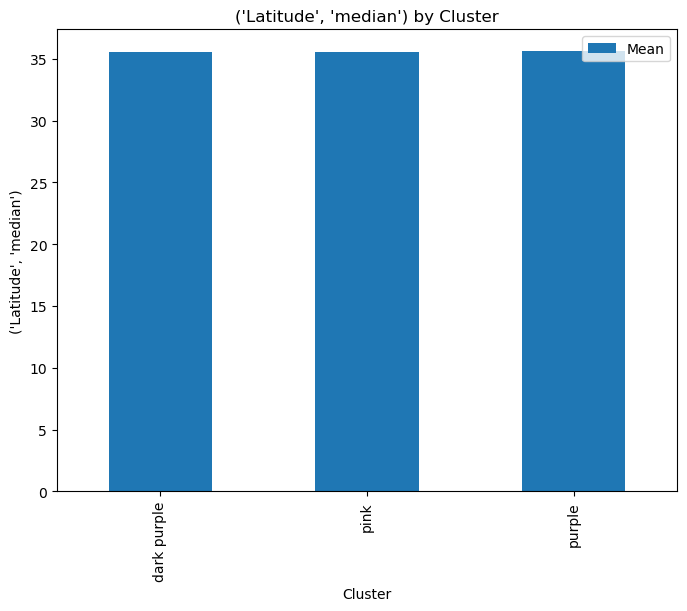

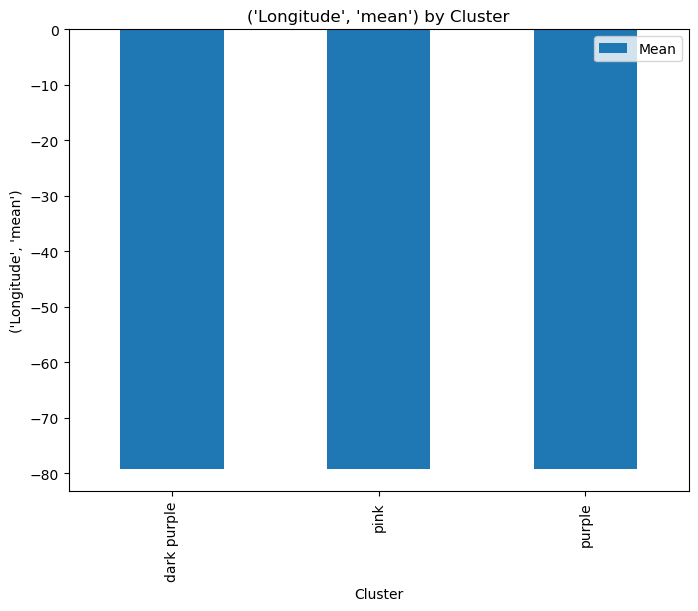

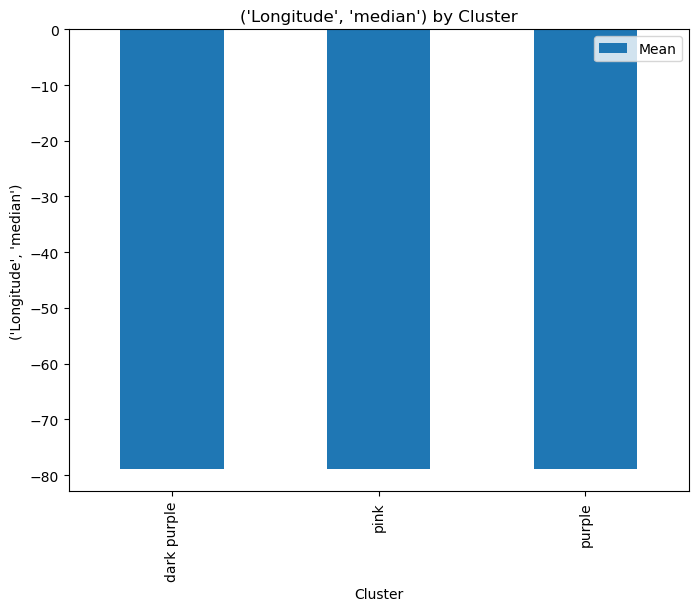

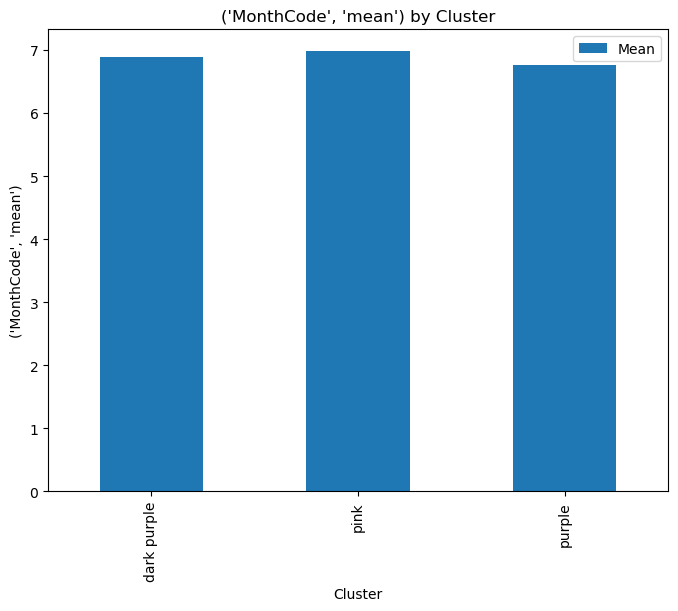

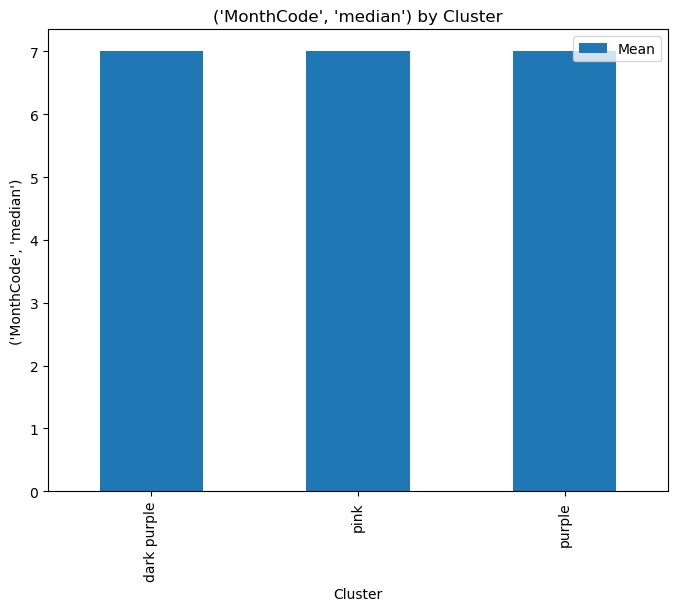

In [30]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = data_to_plot.groupby('cluster').agg({
    'DayCode': ['mean', 'median'],
    'BikeAge': ['mean', 'median'],
    'CrashHour': ['mean', 'median'],
    'CrashYear': ['mean', 'median'],
    'DrvrAge': ['mean', 'median'],
    'Latitude': ['mean', 'median'],
    'Longitude': ['mean', 'median'],
    'MonthCode': ['mean', 'median']
})

# Create bar graphs for each cluster
for column in grouped_data.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    grouped_data[column].plot(kind='bar', ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    ax.set_title(f'{column} by Cluster')
    ax.legend(['Mean', 'Median'])
    plt.show()


## 7. Saving visualizations as images:

In [1]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = data_to_plot.groupby('cluster').agg({
    'DayCode': ['mean', 'median'],
    'BikeAge': ['mean', 'median'],
    'CrashHour': ['mean', 'median'],
    'CrashYear': ['mean', 'median'],
    'DrvrAge': ['mean', 'median'],
    'Latitude': ['mean', 'median'],
    'Longitude': ['mean', 'median'],
    'MonthCode': ['mean', 'median']
})

# Create bar graphs for each cluster and save them as images
for column in grouped_data.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    grouped_data[column].plot(kind='bar', ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    ax.set_title(f'{column} by Cluster')
    ax.legend(['Mean', 'Median'])
    plt.savefig("C:/Users/Ankit/OneDrive/Documents/CareerFoundry/Achievement 6/North Carolina Bike Crash Analysis/05 Visualization/{}.png".format(column))
    plt.close()


NameError: name 'data_to_plot' is not defined

In [32]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = data_to_plot.groupby('cluster').agg({
    'DayCode': ['mean', 'median'],
    'BikeAge': ['mean', 'median'],
    'CrashHour': ['mean', 'median'],
    'CrashYear': ['mean', 'median'],
    'DrvrAge': ['mean', 'median'],
    'Latitude': ['mean', 'median'],
    'Longitude': ['mean', 'median'],
    'MonthCode': ['mean', 'median']
})

# Create bar graphs for each cluster and save them as images
for column in grouped_data.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    grouped_data[column].plot(kind='bar', ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    ax.set_title(f'{column} by Cluster')
    ax.legend(['Mean', 'Median'])
    plt.savefig("C:/Users/Ankit/OneDrive/Documents/CareerFoundry/Achievement 6/North Carolina Bike Crash Analysis/05 Visualization/{}.png".format(column))
    plt.close()


## 8. Count of data points in each cluster:

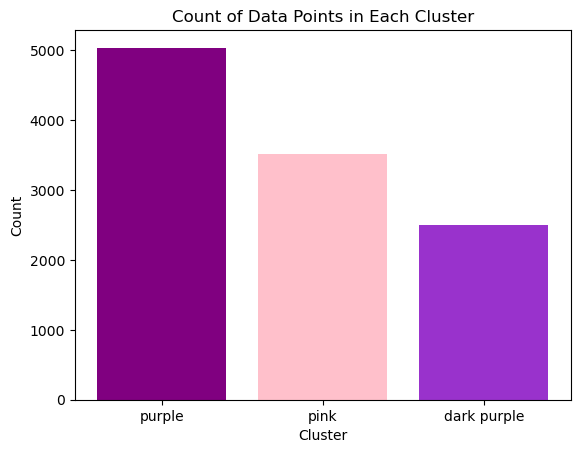

In [33]:
import matplotlib.pyplot as plt

# Calculate value count for each cluster
cluster_counts = data_to_plot['clusters'].value_counts()

# Create a dictionary mapping cluster labels to their names
cluster_names = {
    2: 'dark purple',
    1: 'purple',
    0: 'pink'
}

# Create a list of colors for the bars
colors = ['darkorchid', 'purple', 'pink']

# Create bar graphs for each cluster
for cluster_label, count in cluster_counts.items():
    # Get the cluster name corresponding to the cluster label
    cluster_name = cluster_names[cluster_label]
    
    # Get the index of the current cluster label in the cluster_names dictionary
    cluster_index = list(cluster_names.keys()).index(cluster_label)
    
    # Create a bar graph for the current cluster with the corresponding color
    plt.bar(cluster_name, count, color=colors[cluster_index])

# Set the x-axis label
plt.xlabel('Cluster')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the graph
plt.title('Count of Data Points in Each Cluster')

# Display the graph
plt.show()


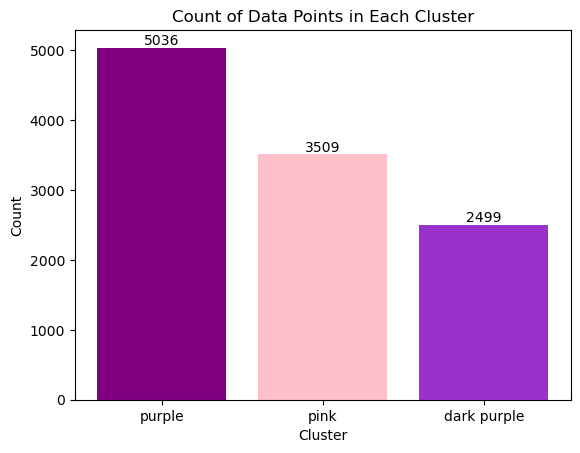

In [35]:
import matplotlib.pyplot as plt

# Calculate value count for each cluster
cluster_counts = data_to_plot['clusters'].value_counts()

# Create a dictionary mapping cluster labels to their names
cluster_names = {
    2: 'dark purple',
    1: 'purple',
    0: 'pink'
}

# Create a list of colors for the bars
colors = ['darkorchid', 'purple', 'pink']

# Create bar graphs for each cluster
for cluster_label, count in cluster_counts.items():
    # Get the cluster name corresponding to the cluster label
    cluster_name = cluster_names[cluster_label]
    
    # Get the index of the current cluster label in the cluster_names dictionary
    cluster_index = list(cluster_names.keys()).index(cluster_label)
    
    # Create a bar graph for the current cluster with the corresponding color
    plt.bar(cluster_name, count, color=colors[cluster_index])
    
    # Add count value as annotation on top of the bar
    plt.text(cluster_name, count, str(count), ha='center', va='bottom')

# Set the x-axis label
plt.xlabel('Cluster')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the graph
plt.title('Count of Data Points in Each Cluster')

# Display the graph
plt.show()


## 9. Correlation heatmap:

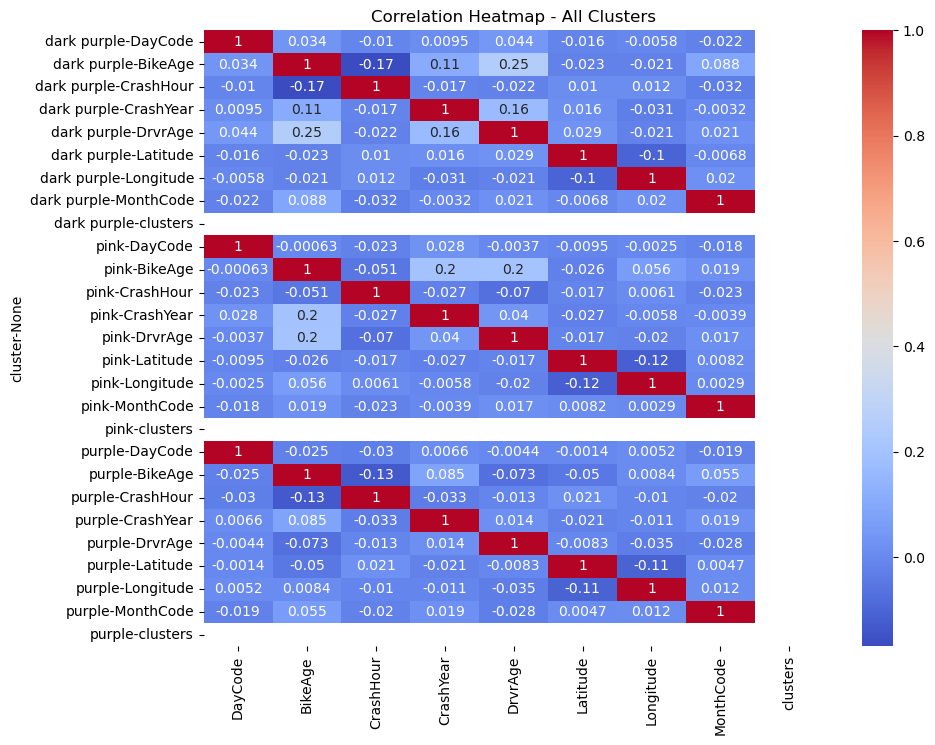

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data_to_plot.groupby('cluster').corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - All Clusters')
plt.show()
